## 1. Welcome!
<p><img src="https://assets.datacamp.com/production/project_1170/img/office_cast.jpeg" alt="Markdown">.</p>
<p><strong>The Office!</strong> What started as a British mockumentary series about office culture in 2001 has since spawned ten other variants across the world, including an Israeli version (2010-13), a Hindi version (2019-), and even a French Canadian variant (2006-2007). Of all these iterations (including the original), the American series has been the longest-running, spanning 201 episodes over nine seasons.</p>
<p>In this notebook, we will take a look at a dataset of The Office episodes, and try to understand how the popularity and quality of the series varied over time. To do so, we will use the following dataset: <code>datasets/office_episodes.csv</code>, which was downloaded from Kaggle <a href="https://www.kaggle.com/nehaprabhavalkar/the-office-dataset">here</a>.</p>
<p>This dataset contains information on a variety of characteristics of each episode. In detail, these are:
<br></p>
<div style="background-color: #efebe4; color: #05192d; text-align:left; vertical-align: middle; padding: 15px 25px 15px 25px; line-height: 1.6;">
    <div style="font-size:20px"><b>datasets/office_episodes.csv</b></div>
<ul>
    <li><b>episode_number:</b> Canonical episode number.</li>
    <li><b>season:</b> Season in which the episode appeared.</li>
    <li><b>episode_title:</b> Title of the episode.</li>
    <li><b>description:</b> Description of the episode.</li>
    <li><b>ratings:</b> Average IMDB rating.</li>
    <li><b>votes:</b> Number of votes.</li>
    <li><b>viewership_mil:</b> Number of US viewers in millions.</li>
    <li><b>duration:</b> Duration in number of minutes.</li>
    <li><b>release_date:</b> Airdate.</li>
    <li><b>guest_stars:</b> Guest stars in the episode (if any).</li>
    <li><b>director:</b> Director of the episode.</li>
    <li><b>writers:</b> Writers of the episode.</li>
    <li><b>has_guests:</b> True/False column for whether the episode contained guest stars.</li>
    <li><b>scaled_ratings:</b> The ratings scaled from 0 (worst-reviewed) to 1 (best-reviewed).</li>
</ul>
    </div>

In [63]:
# Import the libraries
import matplotlib.pyplot as plt
import pandas as pd

# fig size
plt.rcParams['figure.figsize'] = (11, 7)

# Read the data (.csv)
office_df = pd.read_csv('datasets\\the_office_series.csv')

# To check the data remove the '#'
# office_df.head()
# office_df.info()

In [70]:
# Empty color list: cols
cols = []

# Iterating over the dataframe and assinging the colors
for ind, row in office_df.iterrows():
    if row['scaled_ratings'] < 0.25:
        cols.append('red')
    elif row['scaled_ratings'] < 0.50:
        cols.append('orange')
    elif row['scaled_ratings'] < 0.75:
        cols.append('lightgreen')
    else:
        cols.append('darkgreen')



In [71]:
# Empty Size list: sizes
sizes = []

# Iterating over the dataframe and assinging the sizes
for ind, row in office_df.iterrows():
    if row['has_guests'] == False:
        sizes.append(25)
    else:
        sizes.append(250)
        

In [72]:
# Adding additional two columns to the dataframe
office_df['colors'] = cols
office_df['sizes'] = sizes


In [73]:
# Creating two subplots for has_guests column
non_guest_df = office_df[office_df['has_guests'] == False]
guest_df = office_df[office_df['has_guests'] == True]

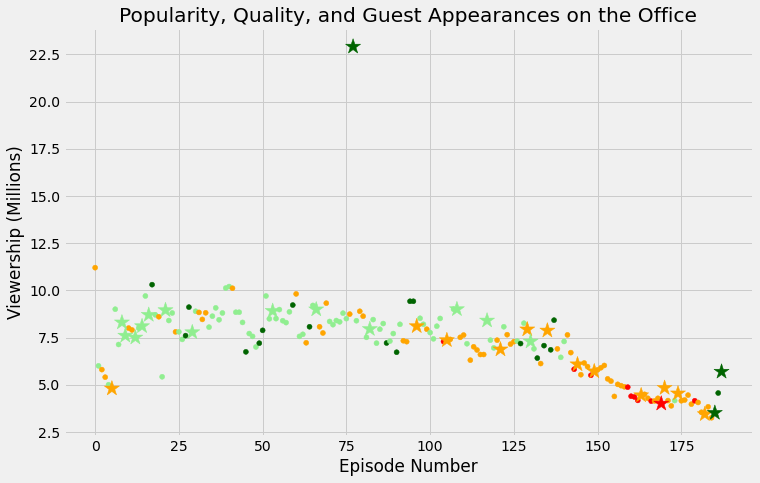

In [74]:
fig = plt.figure()
plt.style.use('fivethirtyeight')

# Creating the first subplot
plt.scatter(x=non_guest_df['episode_number'], # x-axis
            y=non_guest_df['Viewership'],     # y-axis
            c=non_guest_df['colors'],         # color
            s=non_guest_df['sizes'])          # size


plt.scatter(x=guest_df['episode_number'],   # x-axis
            y=guest_df['Viewership'],       # y-axis
            c=guest_df['colors'],           # color
            s=guest_df['sizes'],            # size
            marker='*'                      # marker for Episodes with Guests
            )


# Labels
plt.title("Popularity, Quality, and Guest Appearances on the Office")
plt.xlabel("Episode Number")
plt.ylabel("Viewership (Millions)")
plt.show()

In [75]:
# Checking who was the guest star in the most viewed episode
office_df[office_df['Viewership'] == office_df['Viewership'].max()]['GuestStars']
top_start = 'Jack Black'
print('Top guest star:', top_start)

Top guest star: Jack Black
